In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import pandas as pd

train_data = pd.read_csv('datasets/images/sign_mnist_train.csv')
test_data = pd.read_csv('datasets/images/sign_mnist_test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [4]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [5]:
from tensorflow import one_hot
train_labels = train_data.iloc[:, 0]
train_images = train_data.iloc[:, 1:] / 255

test_labels = test_data.iloc[:, 0]
test_images = test_data.iloc[:, 1:] / 255

train_labels_onehot = one_hot(train_labels, 25)
test_labels_onehot = one_hot(test_labels, 25)

In [6]:
train_labels_onehot

<tf.Tensor: shape=(27455, 25), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

#  Keras Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall 
model = Sequential()

# model.add(Dense(784, activation='relu'))
# model.add(Dense(392, activation='relu'))
# model.add(Dense(196, activation='relu'))
# model.add(Dense(25, activation='softmax'))

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(25, activation='softmax'))

model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 25 , activation = 'softmax'))


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_images.to_numpy().reshape((-1, 28, 28, 1)), train_labels_onehot.numpy(), batch_size=128, epochs=10)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 4s 139us/sample - loss: 0.5114 - accuracy: 0.8503
Epoch 2/10
27455/27455 [==============================] - 2s 81us/sample - loss: 0.0213 - accuracy: 0.9956
Epoch 3/10
27455/27455 [==============================] - 2s 81us/sample - loss: 0.0088 - accuracy: 0.9984
Epoch 4/10
27455/27455 [==============================] - 2s 80us/sample - loss: 0.0032 - accuracy: 0.9996
Epoch 5/10
27455/27455 [==============================] - 2s 80us/sample - loss: 0.0023 - accuracy: 0.9997
Epoch 6/10
27455/27455 [==============================] - 2s 81us/sample - loss: 0.0046 - accuracy: 0.9989
Epoch 7/10
27455/27455 [==============================] - 2s 83us/sample - loss: 0.0200 - accuracy: 0.9942
Epoch 8/10
27455/27455 [==============================] - 2s 80us/sample - loss: 0.0043 - accuracy: 0.9987
Epoch 9/10
27455/27455 [==============================] - 2s 80us/sample - loss: 0.0014 - accuracy: 0.9997
Epoch 10/10
2

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)         

In [6]:
import numpy as np

predict_test_labels = np.argmax(model.predict(test_images.to_numpy().reshape((-1, 28, 28, 1))), axis=-1)
print(predict_test_labels)

NameError: name 'test_images' is not defined

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
#confusion_matrix(test_labels, predict_test_labels)
print('Precision: {}'.format(precision_score(test_labels, predict_test_labels, average='macro')))
print('Recall: {}'.format(recall_score(test_labels, predict_test_labels, average='macro')))

Precision: 0.9635772301331998
Recall: 0.964469387263971


# Prediction

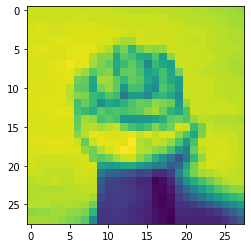

In [31]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('20200907_215044.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
img = img / 255
                     
#Show the image with matplotlib
plt.imshow(img)
plt.show()



In [32]:
predicted_index = np.argmax(model.predict(img.reshape((-1, 28, 28, 1))))
print(model.predict(img.reshape((-1, 28, 28, 1))))
chr(ord('A') + predicted_index)


[[3.96432489e-01 3.39778746e-03 2.65781600e-05 1.17238574e-01
  6.75160321e-04 3.00178584e-03 1.66428334e-04 1.38984411e-04
  3.72717259e-05 4.32608931e-06 9.21615629e-06 1.57781551e-03
  1.01675269e-05 4.55248296e-01 1.92859738e-06 8.80764890e-03
  3.14332399e-04 3.34420321e-07 7.63703056e-08 1.10521754e-02
  3.69306213e-06 3.08995095e-06 2.30713184e-07 2.17344044e-04
  1.63429475e-03]]


'N'

# Save

In [2]:
model.save('christina')

# Load

In [1]:
from tensorflow.keras.models import load_model
model = load_model('christina')

# Save as TensorFlow Lite

In [11]:
# from tensorflow.lite.TFLiteConverter import from_saved_model
# from tensorflow.io.gfile import GFile
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model('christina')
tflite_model = converter.convert()
with tf.io.gfile.GFile('christina.tflite', 'wb') as f:
  f.write(tflite_model)
